In [1]:
import os
import glob
import fitsio
from pathlib import Path
import numpy as np

In [4]:
images = sorted(glob.glob(os.path.join(os.environ['DATA'], 'SDO/AIA/jp2_data/curated/2011/*/fits/*.fits')))
masks = sorted(glob.glob(os.path.join(os.environ['DATA'], 'SDO/AIA/jp2_data/curated/2011/*/label/*.npz')))
len(images), len(masks)

(1349, 1349)

In [49]:
jp2fs_193 = sorted(glob.glob(os.path.join(os.environ['DATA'], 'SDO/AIA/jp2_data/2011/*/jp2/*_SDO_AIA_AIA_193.jp2')))
jp2fs_211 = sorted(glob.glob(os.path.join(os.environ['DATA'], 'SDO/AIA/jp2_data/2011/*/jp2/*_SDO_AIA_AIA_211.jp2')))
jp2fs = jp2fs_193 + jp2fs_211
print(len(jp2fs), jp2fs[0])

5334 /mnt/data2/SDO/AIA/jp2_data/2011/2011_01/jp2/2011_01_17__14_59_55_84__SDO_AIA_AIA_193.jp2


In [50]:
jp2 = glymur.Jp2k(jp2fs[0])
fullres = jp2[:]
fullres.shape, fullres.dtype

((4096, 4096), dtype('uint8'))

In [51]:
jp2p = Path(jp2fs[0])
jp2p

PosixPath('/mnt/data2/SDO/AIA/jp2_data/2011/2011_01/jp2/2011_01_17__14_59_55_84__SDO_AIA_AIA_193.jp2')

In [52]:
fits_dir = Path(jp2p.parent.parent, 'fits')
fits_f = Path(fits_dir, jp2p.stem+'.fits')
fits_f

PosixPath('/mnt/data2/SDO/AIA/jp2_data/2011/2011_01/fits/2011_01_17__14_59_55_84__SDO_AIA_AIA_193.fits')

In [41]:
os.makedirs(fits_dir, exist_ok=True)
fitsio.write(fits_f, fullres.astype(np.int16), compress='rice', clobber=True)

In [53]:
fitsdata = fitsio.read(fits_f)

In [44]:
import matplotlib.pyplot as plt

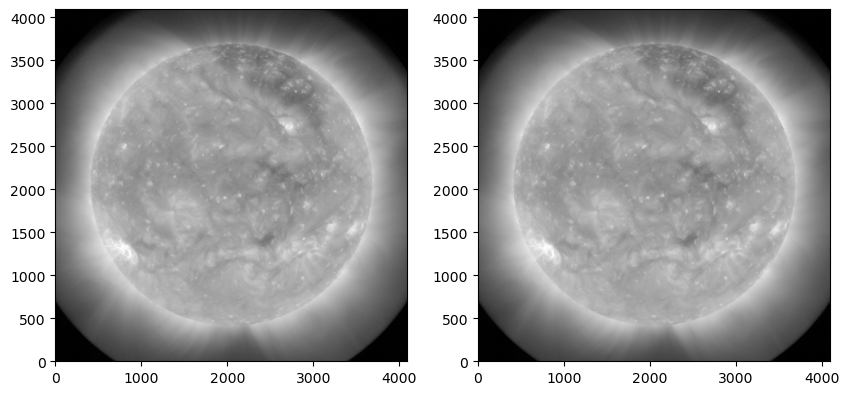

In [54]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,6))
axs[0].imshow(fullres, origin='lower', cmap='gray')
axs[1].imshow(fitsdata, origin='lower', cmap='gray')



In [55]:
fitsdata.max()

255

In [56]:
fullres.max()

255